In [5]:
import pandas as pd
import numpy as np

# DEMOGRAPHIC ANALYSIS USING THE MASTER FILES

In [6]:
citymaster= pd.read_csv("City_Master.csv")
rcodemaster= pd.read_csv("region_code_master.csv")
statemaster= pd.read_csv("State_Master.csv")
custdetails = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
campaign = pd.read_csv("Customer_campaign_details_p1.csv")

In [7]:
citymaster.head()

,City_Code,City_Name,State_Code
0,C1,Henderson,S1
1,C2,Los Angeles,S2
2,C3,Fort Lauderdale,S3
3,C4,Concord,S4
4,C5,Seattle,S5


In [8]:
citymaster.count()

City_Code     531
City_Name     531
State_Code    531
dtype: int64

In [9]:
statemaster

,State_Code,State_Name,Region_Code
0,S1,Kentucky,3
1,S2,California,4
2,S3,Florida,3
3,S4,North Carolina,3
4,S5,Washington,4
5,S6,Texas,1
6,S7,Wisconsin,1
7,S8,Utah,4
8,S9,Nebraska,1
9,S10,Pennsylvania,2


In [10]:
rcodemaster

,Region_Name,Region_Code
0,Central,1
1,East,2
2,South,3
3,West,4
4,North,5


In [11]:
custdetails.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113


In [12]:
#merging the customer bank details and response data and customer response data
cust_outcome = pd.merge(custdetails, target, on='Customer_id', how='inner')
cust_outcome.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no


In [13]:
rcodemaster

,Region_Name,Region_Code
0,Central,1
1,East,2
2,South,3
3,West,4
4,North,5


In [14]:
cust_outcome['Region']= cust_outcome["Region_Code"].replace(['5','1','2','3','4'],['North','Central','East','South','West']);
cust_outcome.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,Region
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes,East
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no,East
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no,East
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes,West
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no,Central


In [15]:
cust_outcome = pd.merge(cust_outcome, statemaster, on='State_Code').sort_values(by="Customer_id")
cust_outcome.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,y,Region,State_Name,Region_Code_y
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no,South,Kentucky,3
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,South,Kentucky,3
520,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,no,West,California,4
7947,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,no,South,Florida,3
7948,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,no,South,Florida,3


In [16]:
co1=cust_outcome.iloc[:,:14]
co1.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,y,Region,State_Name
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no,South,Kentucky
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,South,Kentucky
520,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,no,West,California
7947,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,no,South,Florida
7948,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,no,South,Florida


In [17]:
co1=co1.rename(columns={'Region_Code_x':'Region_Code', 'State_Name_x':'State_Name','y':'Status'})
co1.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,Status,Region,State_Name
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no,South,Kentucky
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,South,Kentucky
520,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,no,West,California
7947,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,no,South,Florida
7948,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,no,South,Florida


In [18]:
analysis_region = pd.pivot_table(co1, index =['Region'],values=['Customer_id'], columns=['Status'], aggfunc='count',margins=True, margins_name='Total')
analysis_region

Customer_id             
Status           no   yes  Total
Region                          
Central        7651   939   8590
East           9390  1168  10558
Na               52     8     60
South          5292   700   5992
West          10491  1393  11884
Total         32876  4208  37084

In [19]:
analysis_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Central to Total
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   (Customer_id, no)     6 non-null      int64
 1   (Customer_id, yes)    6 non-null      int64
 2   (Customer_id, Total)  6 non-null      int64
dtypes: int64(3)
memory usage: 192.0+ bytes


# Percentage Conversion: Region Wise

In [20]:
analysis_region["Percentage"]= analysis_region['Customer_id']['yes']/analysis_region['Customer_id']['Total']*100
analysis_region.head()

Customer_id              Percentage
Status           no   yes  Total           
Region                                     
Central        7651   939   8590  10.931315
East           9390  1168  10558  11.062701
Na               52     8     60  13.333333
South          5292   700   5992  11.682243
West          10491  1393  11884  11.721643

In [21]:
analysis_state = pd.pivot_table(co1, index =['State_Name'],values=['Customer_id'], columns=['Status'], aggfunc='count',margins=True, margins_name='Total')
analysis_state

Customer_id             
Status                        no   yes  Total
State_Name                                   
Alabama                      211    24    235
Arizona                      751    93    844
Arkansas                     201    29    230
California                  6562   865   7427
Colorado                     603    78    681
Connecticut                  262    41    303
Delaware                     313    40    353
District of Columbia          34     6     40
Florida                     1253   157   1410
Georgia                      607    85    692
Idaho                         67    11     78
Illinois                    1593   219   1812
Indiana                      498    64    562
Iowa                          96    13    109
Kansas                        84     7     91
Kentucky                     462    58    520
Louisiana                    132    30    162
Maine                         25     4     29
Maryland                     339    55    394
Massachusetts                444    47    491
Michigan                     865    94    959
Minnesota                    315    32    347
Mississippi                  175    24    199
Missouri                     222    23    245
Montana                       53     2     55
Nebraska                     121    15    136
Nevada                       125    14    139
New Hampshire                 90    12    102
New Jersey                   438    41    479
New Mexico                   129    11    140
New York                    3722   490   4212
North Carolina               817   103    920
North Dakota                  22     4     26
Ohio                        1545   187   1732
Oklahoma                     219    29    248
Oregon                       388    72    460
Pennsylvania                1969   211   2180
Rhode Island                 174    30    204
South Carolina               142    26    168
South Dakota                  42     3     45
Tennessee                    575    83    658
Texas                       3227   387   3614
Utah                         187    18    205
Vermont                       31     4     35
Virginia                     731    81    812
Washington                  1648   233   1881
West Virginia                 11     1     12
Wisconsin                    353    51    404
Wyoming                        3     1      4
Total                      32876  4208  37084

# Percentage Conversion: State wise

In [22]:
analysis_state["Percentage"]= analysis_state['Customer_id']['yes']/analysis_state['Customer_id']['Total']*100
analysis_state

Customer_id              Percentage
Status                        no   yes  Total           
State_Name                                              
Alabama                      211    24    235  10.212766
Arizona                      751    93    844  11.018957
Arkansas                     201    29    230  12.608696
California                  6562   865   7427  11.646694
Colorado                     603    78    681  11.453744
Connecticut                  262    41    303  13.531353
Delaware                     313    40    353  11.331445
District of Columbia          34     6     40  15.000000
Florida                     1253   157   1410  11.134752
Georgia                      607    85    692  12.283237
Idaho                         67    11     78  14.102564
Illinois                    1593   219   1812  12.086093
Indiana                      498    64    562  11.387900
Iowa                          96    13    109  11.926606
Kansas                        84     7     91   7.692308
Kentucky                     462    58    520  11.153846
Louisiana                    132    30    162  18.518519
Maine                         25     4     29  13.793103
Maryland                     339    55    394  13.959391
Massachusetts                444    47    491   9.572301
Michigan                     865    94    959   9.801877
Minnesota                    315    32    347   9.221902
Mississippi                  175    24    199  12.060302
Missouri                     222    23    245   9.387755
Montana                       53     2     55   3.636364
Nebraska                     121    15    136  11.029412
Nevada                       125    14    139  10.071942
New Hampshire                 90    12    102  11.764706
New Jersey                   438    41    479   8.559499
New Mexico                   129    11    140   7.857143
New York                    3722   490   4212  11.633428
North Carolina               817   103    920  11.195652
North Dakota                  22     4     26  15.384615
Ohio                        1545   187   1732  10.796767
Oklahoma                     219    29    248  11.693548
Oregon                       388    72    460  15.652174
Pennsylvania                1969   211   2180   9.678899
Rhode Island                 174    30    204  14.705882
South Carolina               142    26    168  15.476190
South Dakota                  42     3     45   6.666667
Tennessee                    575    83    658  12.613982
Texas                       3227   387   3614  10.708356
Utah                         187    18    205   8.780488
Vermont                       31     4     35  11.428571
Virginia                     731    81    812   9.975369
Washington                  1648   233   1881  12.387028
West Virginia                 11     1     12   8.333333
Wisconsin                    353    51    404  12.623762
Wyoming                        3     1      4  25.000000
Total                      32876  4208  37084  11.347212

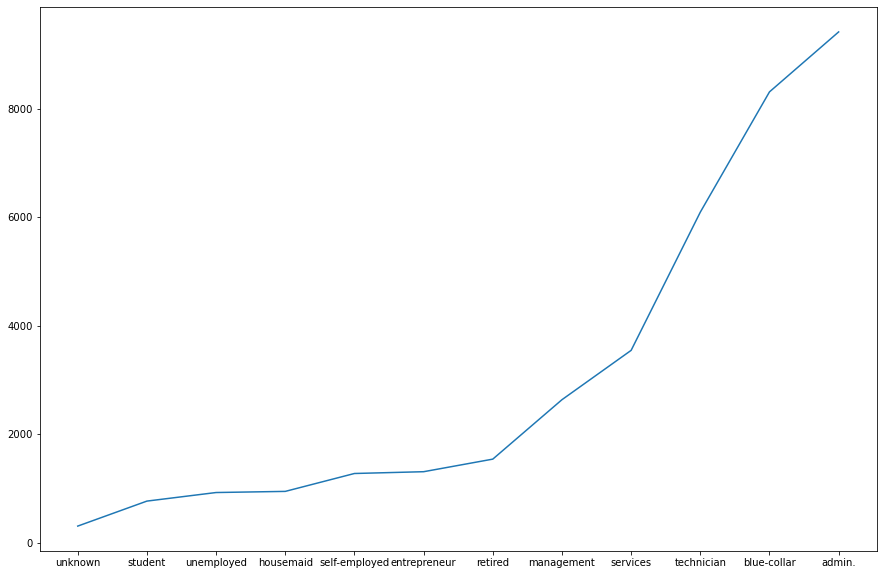

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(co2["job"].value_counts(ascending=True))

The graph gives a clear indication that The Admin and Blue collared jobshave more been researched about.


So the data has been more bent towards the Service Secton of the society.


In [72]:
analysis_job = pd.pivot_table(co1, index =['job'],values=['Customer_id'], columns=['Status'], aggfunc='count',margins=True, margins_name='Total')
analysis_job["Percentage"]= analysis_job['Customer_id']['yes']/analysis_job['Customer_id']['Total']*100
analysis_job

Customer_id              Percentage
Status                 no   yes  Total           
job                                              
admin.               8174  1246   9420  13.227176
blue-collar          7738   576   8314   6.928073
entrepreneur         1198   111   1309   8.479756
housemaid             853    93    946   9.830867
management           2345   292   2637  11.073189
retired              1146   395   1541  25.632706
self-employed        1145   131   1276  10.266458
services             3249   298   3547   8.401466
student               527   240    767  31.290743
technician           5439   657   6096  10.777559
unemployed            791   134    925  14.486486
unknown               271    35    306  11.437908
Total               32876  4208  37084  11.347212

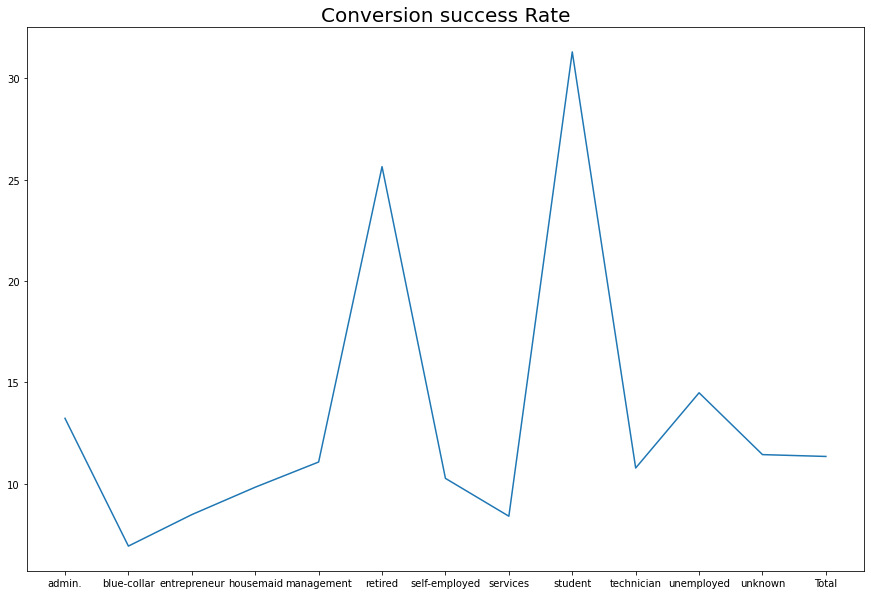

In [80]:
plt.figure(figsize=(15,10))
plt.title("Conversion success Rate", fontsize=20)
plt.plot(analysis_job["Percentage"])

The graph shows how the conversion rate is higher among the retired personnel and the students.

####Region Wise Conversion Comparision####

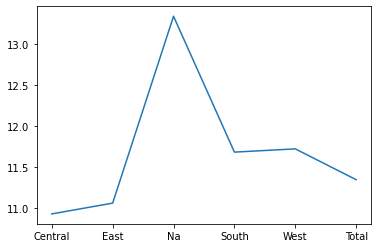

In [89]:
plt.plot(analysis_region["Percentage"])

In [126]:
analysis_region

Customer_id              Percentage
Status           no   yes  Total           
Region                                     
Central        7651   939   8590  10.931315
East           9390  1168  10558  11.062701
Na               52     8     60  13.333333
South          5292   700   5992  11.682243
West          10491  1393  11884  11.721643
Total         32876  4208  37084  11.347212

Above Graph clearly indicates that the Central region has lesser conversion rate than the other regions.


It also indicates how South and West regions are above the counrt average when it comes to conversion rate.

# Socio Economic Analysis

In [23]:
soc_eco= pd.read_csv("Customer_social_economic_data_p1.csv")

In [24]:
soc_eco.tail()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37079,37080,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,-1.1,94.767,-50.8,1.028,4963.6
37083,37084,-1.1,94.767,-50.8,1.028,4963.6


In [25]:
co2 = pd.merge(co1, soc_eco, on='Customer_id').sort_values(by="Customer_id")

In [26]:
co2.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,Status,Region,State_Name,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes,East,New York,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no,East,New York,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no,East,New York,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes,West,Arizona,-1.1,94.767,-50.8,1.028,4963.6
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no,Central,Texas,-1.1,94.767,-50.8,1.028,4963.6


In [90]:
co2["cons.price.idx"].value_counts(ascending=True).head()

92.756      9
93.798     63
94.767    118
92.713    157
93.749    162
Name: cons.price.idx, dtype: int64

In [91]:
co2["cons.conf.idx"].value_counts(ascending=True).head()

-45.9      9
-40.4     63
-50.8    118
-33.0    157
-34.6    162
Name: cons.conf.idx, dtype: int64

In [104]:
analysis_empvarrate= co2["emp.var.rate"].value_counts(ascending=True)
analysis_empvarrate

-0.2        9
-3.0      157
-1.1      568
-1.7      696
-3.4      948
-2.9     1484
-0.1     3329
 1.1     7000
-1.8     8295
 1.4    14598
Name: emp.var.rate, dtype: int64

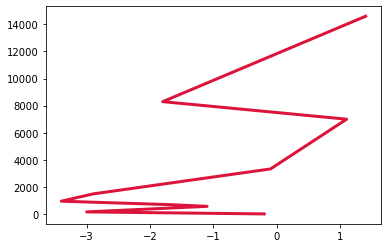

In [124]:
plt.plot(analysis_empvarrate, linewidth=3, color="crimson")

Consumer Confidence Index Trend across the data given

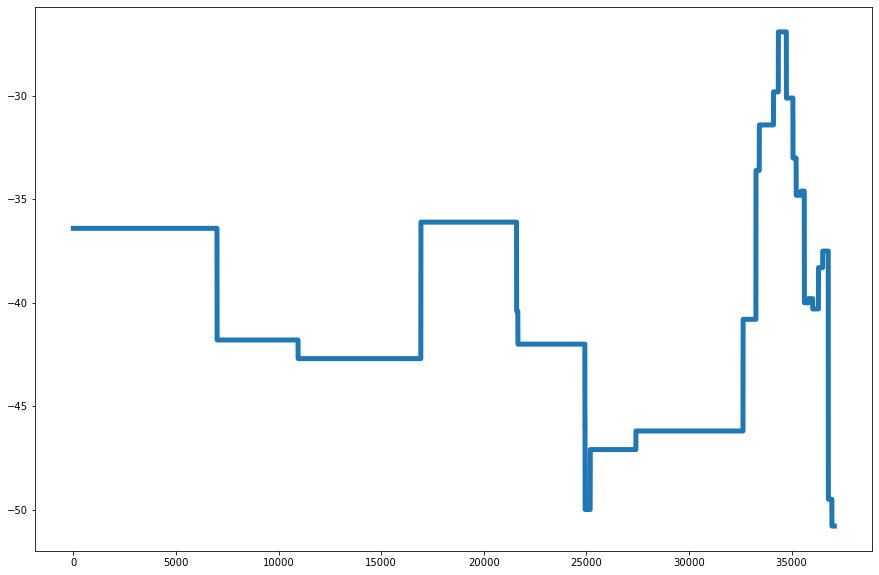

In [76]:
plt.figure(figsize=(15,10))
plt.plot(co2["cons.conf.idx"],linewidth=5)

Consumer Price Index across the data given

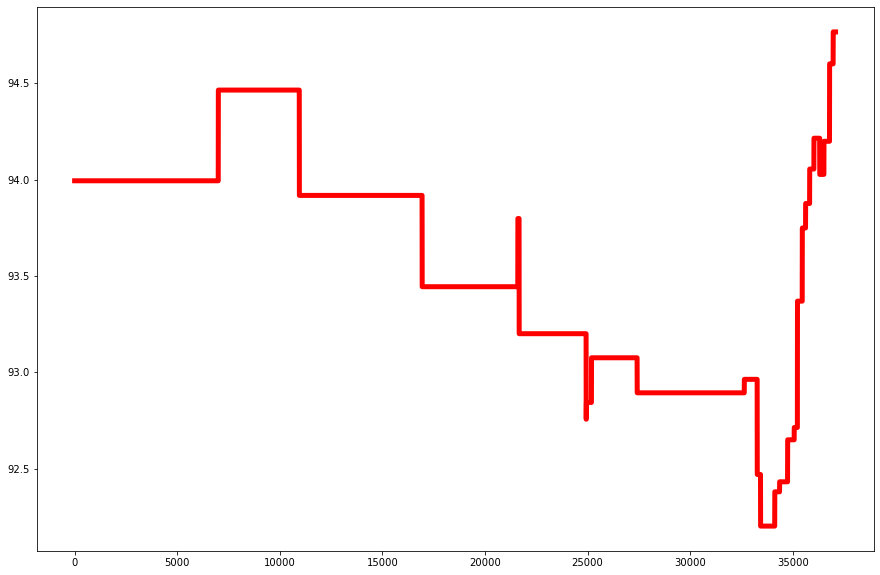

In [77]:
plt.figure(figsize=(15,10))
plt.plot(co2["cons.price.idx"],linewidth=5,c="Red")

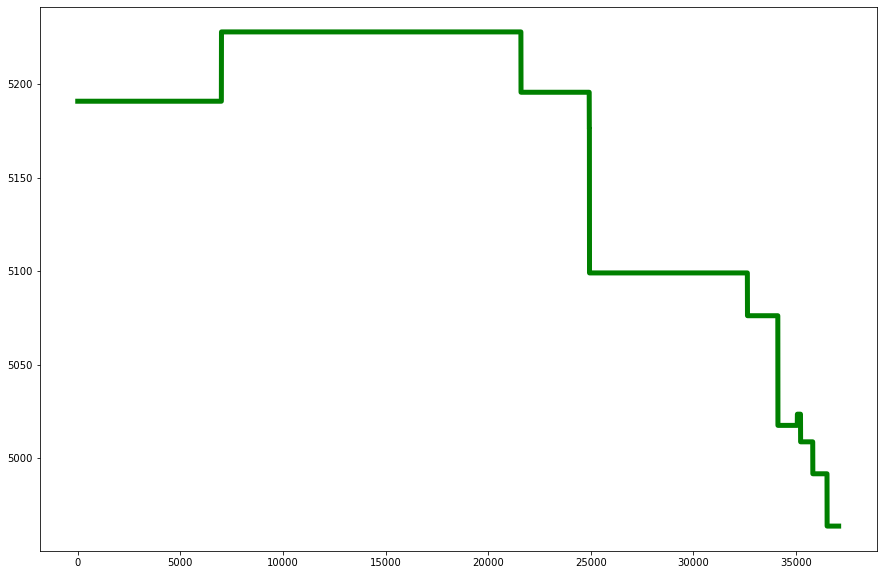

In [50]:
plt.figure(figsize=(15,10))
plt.plot(co2["nr.employed"],linewidth=5,c="Green")

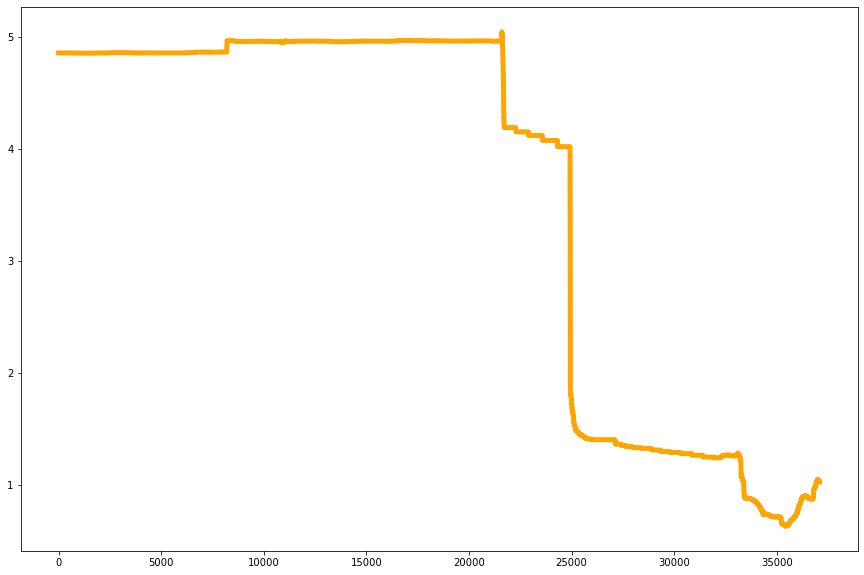

In [52]:
plt.figure(figsize=(15,10))
plt.plot(co2["euribor3m"],linewidth=5,c="Orange")